In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import cv2
import dlab
from skimage import transform

In [3]:
train_data='/Users/stephenowen/Desktop/395/final/fiction/fruits-360/Training'
test_data='/Users/stephenowen/Desktop/395/final/fiction/fruits-360/Test'

In [4]:
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)

In [5]:
Y_train = np_utils.to_categorical(Y_train, 120)
Y_test = np_utils.to_categorical(Y_test, 120)
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [7]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
X_val = np.array(convert_image_to_array(X_val))
X_test = np.array(convert_image_to_array(X_test))

In [8]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [9]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 256,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(120,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)       

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits_adam.hdf5', verbose = 1, save_best_only = True)

# running 
CNN_model = model.fit(X_train,Y_train,
        batch_size = 120,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 48398 samples, validate on 12100 samples
Epoch 1/20
 - 167s - loss: 0.0430 - accuracy: 0.9854 - val_loss: 7.8725e-04 - val_accuracy: 0.9998

Epoch 00001: val_loss improved from inf to 0.00079, saving model to cnn_from_scratch_fruits_adam.hdf5
Epoch 2/20
 - 158s - loss: 0.0429 - accuracy: 0.9850 - val_loss: 0.0259 - val_accuracy: 0.9896

Epoch 00002: val_loss did not improve from 0.00079
Epoch 3/20
 - 169s - loss: 0.0412 - accuracy: 0.9862 - val_loss: 6.7677e-04 - val_accuracy: 0.9999

Epoch 00003: val_loss improved from 0.00079 to 0.00068, saving model to cnn_from_scratch_fruits_adam.hdf5
Epoch 4/20
 - 160s - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0012 - val_accuracy: 0.9998

Epoch 00004: val_loss did not improve from 0.00068
Epoch 5/20
 - 162s - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0017 - val_accuracy: 0.9997

Epoch 00005: val_loss did not improve from 0.00068
Epoch 6/20
 - 160s - loss: 0.0352 - accuracy: 0.9881 - val_loss: 0.0011 - val_accuracy: 0.9996

Epoch

In [31]:
model.load_weights('cnn_from_scratch_fruits_adam.hdf5')

In [32]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

20622/20622 [==============================] - 25s 1ms/step
Test accuracy: 0.9884589314460754


In [34]:

def load(filename):
    #img = cv2.imread(filename)
    #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #_, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TRUNC)
    #img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
    #img_contours = sorted(img_contours, key=cv2.contourArea)

    #for i in img_contours:
    #    if cv2.contourArea(i) > 100:
    #        break
    #mask = np.zeros(img.shape[:2], np.uint8)
    #cv2.drawContours(mask, [i],-1, 255, -1)
    #new_img = cv2.bitwise_and(img, img, mask=mask)
    #cv2.imwrite('/Users/stephenowen/Desktop/395/final/fiction/out.jpg', new_img) 

    
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (100, 100, 3))
    np_image = np.expand_dims(np_image, axis=0)
    
   
    return np_image



In [78]:
def classify(filename):
    image = load(filename)
    x=model.predict(image)
    score = np.argmax(x)
    percent = np.max(x)*100
    if percent > 80:
        print("I think this is a "+labels[score])
        print("And I'm "+str(percent)+"% sure of it!")
    else:
        print("I'm not too sure what this is, I think it might be a "+labels[score]+", but I'm not too confident in that.")

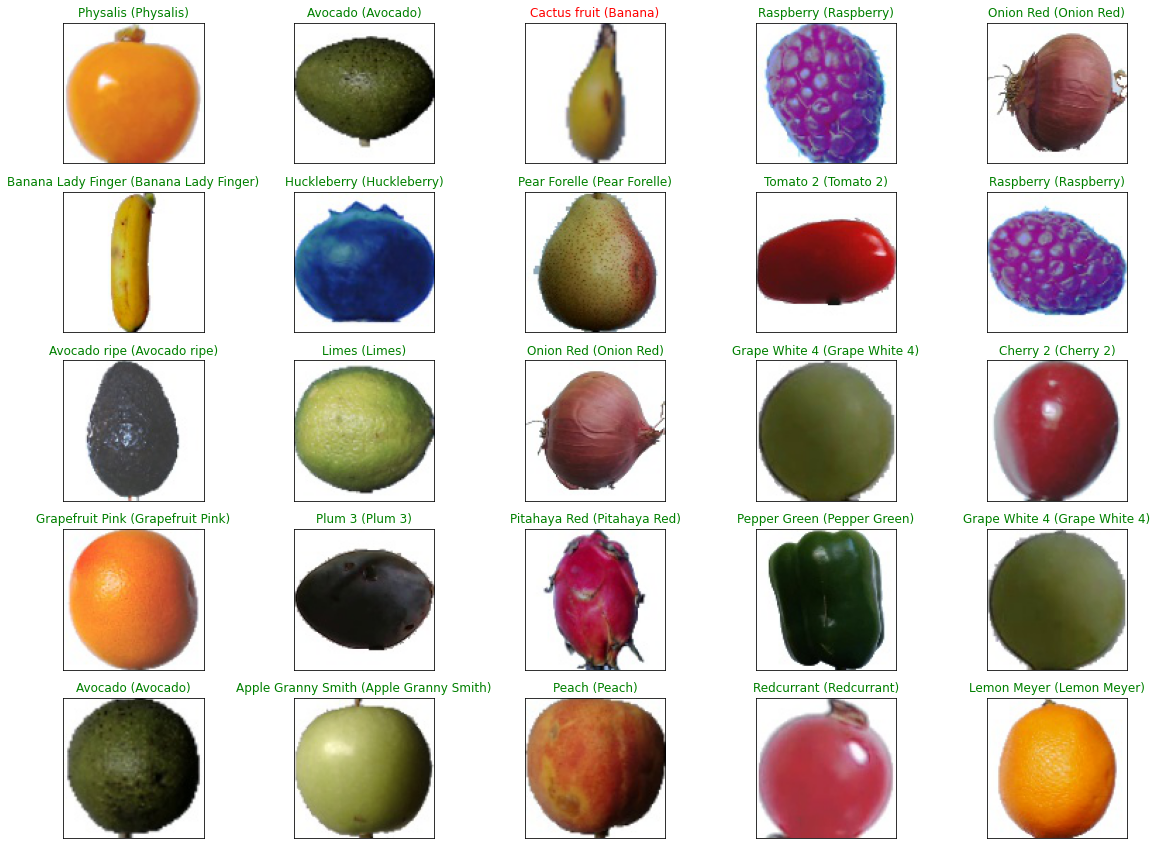

In [152]:
Y_pred = model.predict(X_test)
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

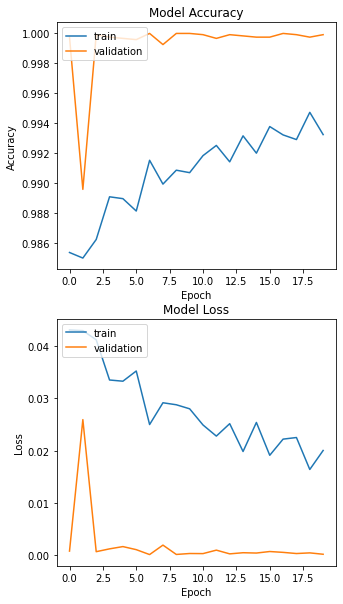

In [154]:
plt.figure(1, figsize = (5, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['accuracy'])  
plt.plot(CNN_model.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [49]:
print(CNN_model.history)

{'val_loss': [0.000787254631523106, 0.025906018284149467, 0.0006767697024146446, 0.0012168259215008415, 0.0016511624185527166, 0.0010654769045972034, 0.00012614928613297068, 0.001932468184561965, 0.00014936933639847282, 0.00032855885605769333, 0.0003101290497615691, 0.0009726954446363349, 0.0002607105802134589, 0.00047786071931760253, 0.0004177394851602694, 0.0007081751240732482, 0.0005464868753387995, 0.0003237053151268874, 0.0004487766810047207, 0.00018607133096106585], 'val_accuracy': [0.9997520446777344, 0.9895867705345154, 0.9999173283576965, 0.9997520446777344, 0.9996694326400757, 0.9995867609977722, 1.0, 0.9992561936378479, 1.0, 1.0, 0.9999173283576965, 0.9996694326400757, 0.9999173283576965, 0.9998347163200378, 0.9997520446777344, 0.9997520446777344, 1.0, 0.9999173283576965, 0.9997520446777344, 0.9999173283576965], 'loss': [0.04303556691491962, 0.04290423309936571, 0.041153401499619505, 0.03347281206381999, 0.033243481356158275, 0.035192393880087165, 0.02496377888703165, 0.0291

In [132]:
classify('/Users/stephenowen/Downloads/pinkbanana.jpg')

I think this is a Physalis with Husk
And I'm 94.90460753440857% sure of it!


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [125]:
##unused
def bwflip(array):
    for col in array:
        for idx in col:
            if idx.all()==0:
                #print(col[0])
                col[0]=255
                col[1]=255
                col[2]=255
                #print(col[0])
    return array

'jpe'